In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stat
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st 

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
dic = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7, 'aug':8, 'sep':9,'oct':10,'nov':11,'dec':12}
dic2 = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

In [4]:
df['month'] = df['month'].apply(lambda x: dic[x])
df['day'] = df['day'].apply(lambda x: dic2[x])

In [5]:
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      8    7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      8    7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3     11    2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [6]:
df['newarea'] = df['area'].apply(lambda x: np.log(x+1))

In [7]:
df['lnISI'] = df['ISI'].apply(lambda x: np.log(x+1))

In [8]:
import seaborn as sns

In [9]:
import matplotlib.image as mpimg

In [9]:
df['transf'] = 7*df['X'] - df['Y']

In [10]:
df['transf'].nunique()

36

In [11]:
df['transf'].unique()

array([44, 45, 50, 37, 30, 51, 38, 31, 39, 46, 24, 29, 36, 25, 12, 23, 54,
        4,  5, 17, 10, 16,  9, 22, 15,  3, 53,  2, 59, 43, 18, 11, 57, 52,
       58, 48], dtype=int64)

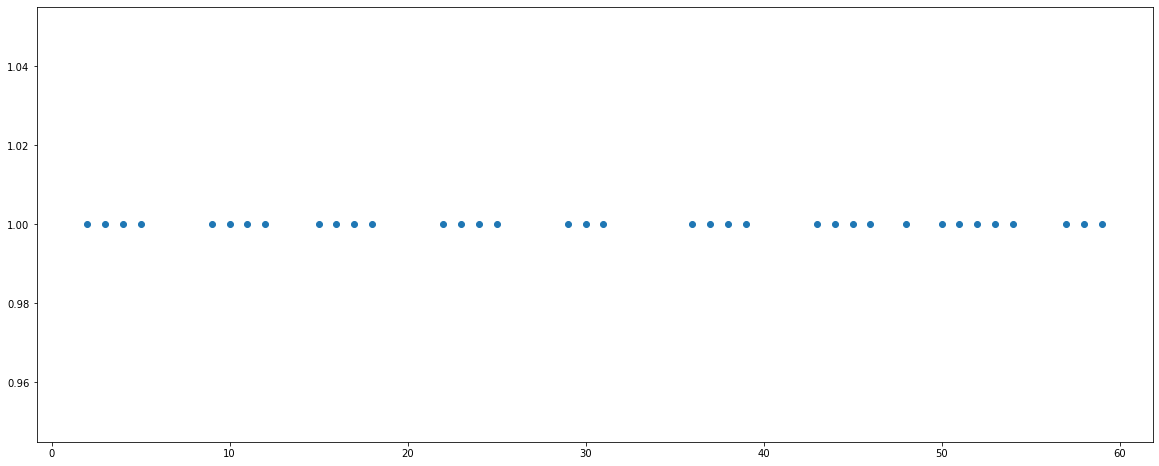

In [13]:
plt.figure(figsize=(20,8))
plt.plot(df['transf'].unique(),np.ones(len(df['transf'].unique())), 'o');

In [10]:
plot_map = np.array(df.iloc[:,4:9]).T
t1 = df.columns[4:9]

### Pruebas de Kruskal-Wallis  y de Levene

De acuerdo con el trabajo de Flores, Miranda y Villasis títulado El protocolo de investigación VI: cómo elegir la prueba
estadística adecuada, para el caso de comparar más de 3 grupos de variables cuantitativas sin distribución normal la prueba recomendada es la prueba de Kruskal- Wallis en el caso de muestras independientes.
El test H de Kruskal-WALLIS dice en la hipótesis nula que la media de la población de todos los grupos es igual, es una versión no paramétrica del test ANOVA y funciona para dos o más muestras independientes que pueden tener diferentes tamaños y permite determinar si dos o más muestras pertenecen a la misma distribución.

Una de las condiciones es la homoestadicidad de los datos para lo cuál se tiene que comprobar que los datos presentan la misma varianza, para ello existen dos pruebas, la primera es la prueba de Bartlett que se utiliza para datos que se pueden modelar con una distribución normal y la prueba de Levene para la cuál no es necesario que se cumpla esta condición

Uno de los inconveniente de la prueba de Kruskal-Wallis está en el caso de que el p-value sea muy pequeño y se descarte la hipotesis nula no se especifica en que grupos la hipotesis nula falla por lo que se requiere de otras pruebas estadisticas como las pruebas de correción de Bonferroni o de Holm

### Referencias
http://www.scielo.org.mx/pdf/ram/v64n3/2448-9190-ram-64-03-0364.pdf

#  Independencia de zona

## ISI

In [11]:
s = [np.array(i) for i in df.groupby('transf')['ISI'].apply(list).tolist()]

In [20]:
np.arange(36)*[True if len(e) >= 4 else False for e in s]

array([ 0,  1,  2,  3,  4,  5,  0,  7,  8,  9, 10,  0, 12, 13, 14, 15, 16,
        0, 18,  0, 20, 21, 22,  0, 24, 25,  0,  0, 28, 29,  0,  0, 32,  0,
        0, 35])

In [21]:
st.levene(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],
          s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18],s[19],s[20],
          s[21],s[22],s[23],s[24],s[25],s[26],s[27],s[28],s[29],s[30],
         s[31],s[32],s[33],s[34],s[35])

LeveneResult(statistic=0.9460351983619065, pvalue=0.5597503332854624)

In [22]:
st.kruskal(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],
          s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18],s[19],s[20],
          s[21],s[22],s[23],s[24],s[25],s[26],s[27],s[28],s[29],s[30],
         s[31],s[32],s[33],s[34],s[35])

KruskalResult(statistic=40.032840951782546, pvalue=0.2566246959648868)

En este caso la prueba de Levine no se rechaza la hipotesis nula y se confirma la homoestacidad de los grupos por lo que en el test de Kruskal se cumpla una de las condiciones en la que se basa, en el caso de su resultado de 0.25 es mayor a un nivel de significancia de 0.05 por lo que no se rechaza la hipotesis nula y entonces las muestras estadisticamente pertenecen a la misma distribución y se acepta la independencia del coeficiente ISI de las zonas donde se generan los incendios.

## Ln ISI

In [23]:
s = [np.array(i) for i in df.groupby('transf')['lnISI'].apply(list).tolist()]

In [24]:
st.levene(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],
          s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18],s[19],s[20],
          s[21],s[22],s[23],s[24],s[25],s[26],s[27],s[28],s[29],s[30],
         s[31],s[32],s[33],s[34],s[35])

LeveneResult(statistic=1.2685646346910495, pvalue=0.14371376687975237)

In [25]:
st.kruskal(s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],
          s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18],s[19],s[20],
          s[21],s[22],s[23],s[24],s[25],s[26],s[27],s[28],s[29],s[30],
         s[31],s[32],s[33],s[34],s[35])

KruskalResult(statistic=40.032840951782546, pvalue=0.2566246959648868)

## DC

In [26]:
m = [np.array(i) for i in df.groupby('transf')['DC'].apply(list).tolist()]

In [27]:
st.levene(m[0],m[1],m[2],m[3],m[4],m[5],m[6],m[7],m[8],m[9],m[10],
          m[11],m[12],m[13],m[14],m[15],m[16],m[17],m[18],m[19],m[20],
          m[21],m[22],m[23],m[24],m[25],m[26],m[27],m[28],m[29],m[30],
         m[31],m[32],m[33],m[34],m[35])

LeveneResult(statistic=1.5458936330137762, pvalue=0.026065775290141428)

In [28]:
st.kruskal(m[0],m[1],m[2],m[3],m[4],m[5],m[6],m[7],m[8],m[9],m[10],
          m[11],m[12],m[13],m[14],m[15],m[16],m[17],m[18],m[19],m[20],
          m[21],m[22],m[23],m[24],m[25],m[26],m[27],m[28],m[29],m[30],
         m[31],m[32],m[33],m[34],m[35])

KruskalResult(statistic=56.28778645820775, pvalue=0.012719496029220366)

En este caso la prueba de Levine no se rechaza la hipotesis nula y se confirma la homoestacidad de los grupos por lo que en el test de Kruskal se cumpla una de las condiciones en la que se basa, en el caso de su resultado de 0.25 es mayor a un nivel de significancia de 0.01 por lo que no se rechaza la hipotesis nula y entonces las muestras estadisticamente pertenecen a la misma distribución y se acepta la independencia del coeficiente DC de las zonas donde se generan los incendios.

## DMC

In [29]:
l = [np.array(i) for i in df.groupby('transf')['DMC'].apply(list).tolist()]

In [30]:
st.levene(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],
          l[11],l[12],l[13],l[14],l[15],l[16],l[17],l[18],l[19],l[20],
          l[21],l[22],l[23],l[24],l[25],l[26],l[27],l[28],l[29],l[30],
         l[31],l[32],l[33],l[34],l[35])


LeveneResult(statistic=1.3824348288408717, pvalue=0.07500854223574893)

In [31]:
st.kruskal(l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],
          l[11],l[12],l[13],l[14],l[15],l[16],l[17],l[18],l[19],l[20],
          l[21],l[22],l[23],l[24],l[25],l[26],l[27],l[28],l[29],l[30],
         l[31],l[32],l[33],l[34],l[35])


KruskalResult(statistic=65.08628209631951, pvalue=0.0014942696569432185)

En este caso la prueba de Levine no se rechaza la hipotesis nula y se confirma la homoestacidad de los grupos por lo que en el test de Kruskal se cumpla una de las condiciones en la que se basa, en el caso de su resultado de 0.25 es mayor a un nivel de significancia de 0.05 por lo que  se rechaza la hipotesis nula y entonces las muestras estadisticamente no pertenecen a la misma distribución y no se acepta la independencia del coeficiente DMC de las zonas donde se generan los incendios. Se procede entonces a hacer pruebas post hoc para determinar que zonas no cumplen con la hipotesis nula.

## Area

In [32]:
a = [np.array(i) for i in df.groupby('transf')['newarea'].apply(list).tolist()]

In [33]:
st.levene(a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],
          a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],
          a[21],a[22],a[23],a[24],a[25],a[26],a[27],a[28],a[29],a[30],
         a[31],a[32],a[33],a[34],a[35])


LeveneResult(statistic=1.3598122210393773, pvalue=0.08587004956120699)

In [34]:
st.kruskal(a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],
          a[11],a[12],a[13],a[14],a[15],a[16],a[17],a[18],a[19],a[20],
          a[21],a[22],a[23],a[24],a[25],a[26],a[27],a[28],a[29],a[30],
         a[31],a[32],a[33],a[34],a[35])


KruskalResult(statistic=56.840482643578, pvalue=0.011219103755058107)

En este caso la prueba de Levine no se rechaza la hipotesis nula y se confirma la homoestacidad de los grupos por lo que en el test de Kruskal se cumpla una de las condiciones en la que se basa, en el caso de su resultado de 0.25 es mayor a un nivel de significancia de 0.05 por lo que no se rechaza la hipotesis nula y entonces las muestras estadisticamente pertenecen a la misma distribución y se acepta la independencia del area quemada de las zonas donde se generan los incendios.

## Pruebas multiestadistico de Correción o Pruebas Post Hoc

Para ver en que grupos la prueba de Kruskal-Wallis falla se puede hacer las pruebas multiestadistico de correción. Una de las pruebas más comunes que se usa es el Test de Holm o también conocida como Bonferroni-Holm. En ella se orden ascendentemente todos los p-value. Se compara el p-value con el alfa dividido entre el número de muestras, en el caso de que el p-value sea menor se detiene el proceso y por tanto se rechaza la comparación, se pasa al siguiente p-value y se compará con el alfa menos uno. El proceso se repite hasta detenerse cuando la comparación ya no sea significativa. En la siguiente imagén se puede visualizar de mejor manera el funcionamiento de la prueba.
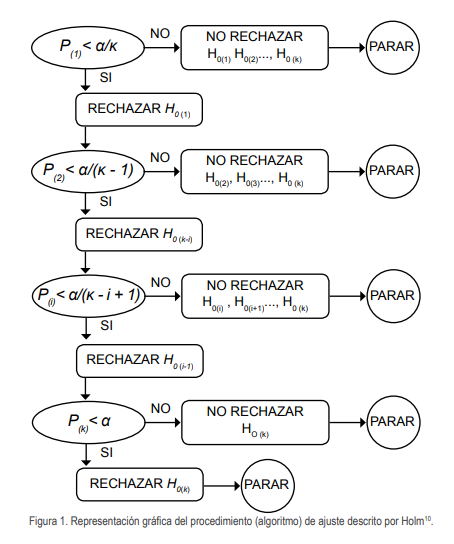

In [35]:
import itertools

In [36]:
comb = list(itertools.combinations(range(36), 2))

In [37]:
k = [st.kruskal(l[i[0]],l[i[1]])[1] for i in comb]

In [38]:
from statsmodels.stats.multitest import multipletests

In [40]:
multipletests(k, alpha = 0.1,method = 'holm')[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Como no hay un resultado positivo en las prueba de correcion de Holm entonces se acepta la hipotesis nula de que las muestras tienen la misma media por lo que el coeficiente DMC es independiente de la zona donde se genera el valor

En base a todas las pruebas realizadas anteriormente se pueden confirmar las hipotesis de que los indices ISI, DC y DMC además del area quemada son independientes de la zona donde se generan.

# Independencia de mes

Como se puede observar en los boxplot de los datos observados las distribuciones de los indices varían conforme avanzan los meses, sobre todo el DC y el DMC cambian debido a las lluvias en verano, en el caso del ISI se puede observar es menor que el DC y el DMC pero a pesar de eso el p-value sigue siendo muy bajo, cuando se consideran solamente los meses de verano se mejorá aun más el p-value aunque sigue siendo menor a un alfa de 0.01 lo cuál ya es bajo. Para el caso del area quemada es independiente del mes en el que inicia el incendio.

En los casos de DC, ISI y DMC se realiza la prueba de Holm para ver que distribuciones no tienen parecido además de que se ofrecen histogramas para poder compararlos más facilmente y corroborar los resultados de Holm

## ISI

In [105]:
sm = [np.array(i) for i in df.groupby('month')['ISI'].apply(list).tolist()]

In [48]:
st.levene(sm[0],sm[1],sm[2],sm[3],sm[4],sm[5],sm[6],sm[7],sm[8],sm[9],sm[10],sm[11])

LeveneResult(statistic=4.728189310982891, pvalue=6.419049105390486e-07)

In [49]:
st.kruskal(sm[0],sm[1],sm[2],sm[3],sm[4],sm[5],sm[6],sm[7],sm[8],sm[9],sm[10],sm[11])

KruskalResult(statistic=138.41400351322278, pvalue=3.4225226743273275e-24)

 En ambos casos se rechaza la hipotesis nula y entonces la muestras no son independientes del mes

## Restricción de meses

In [110]:
st.levene(sm[5],sm[6],sm[7],sm[8])

LeveneResult(statistic=11.090990579995715, pvalue=5.230914909599838e-07)

In [111]:
st.kruskal(sm[5],sm[6],sm[7],sm[8])

KruskalResult(statistic=36.5574838512123, pvalue=5.70818705880492e-08)

## Post Hoc Holm

In [126]:
comb_k = list(itertools.combinations(range(5,9), 2))

In [125]:
comb_k

[(5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]

In [130]:
ksm = [st.kruskal(sm[i[0]],sm[i[1]])[1] for i in comb_k]

In [131]:
multipletests(ksm, alpha = 0.1,method = 'holm')[0]

array([False, False, False, False, False,  True])

<AxesSubplot:ylabel='Density'>

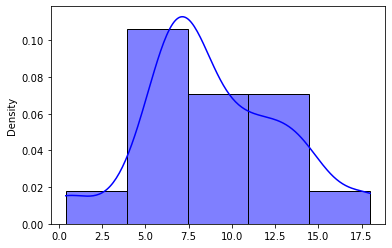

In [116]:
sns.histplot(data=sm[5], stat='density', kde=True, kde_kws={'bw_method': .4}, color='b', bins=5)

<AxesSubplot:ylabel='Density'>

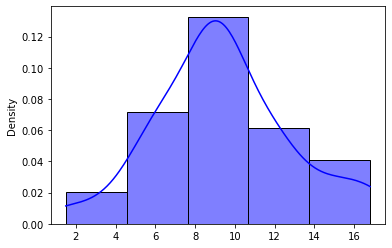

In [117]:
sns.histplot(data=sm[6], stat='density', kde=True, kde_kws={'bw_method': .4}, color='b', bins=5)

<AxesSubplot:ylabel='Density'>

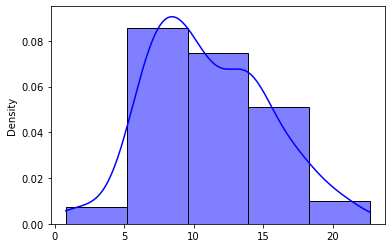

In [118]:
sns.histplot(data=sm[7], stat='density', kde=True, kde_kws={'bw_method': .4}, color='b', bins=5)

<AxesSubplot:ylabel='Density'>

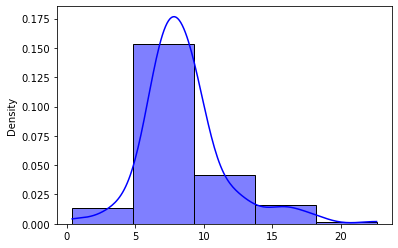

In [119]:
sns.histplot(data=sm[8], stat='density', kde=True, kde_kws={'bw_method': .4}, color='b', bins=5)

# DC

In [53]:
dcm = [np.array(i) for i in df.groupby('month')['DC'].apply(list).tolist()]

In [54]:
st.levene(dcm[0],dcm[1],dcm[2],dcm[3],dcm[4],dcm[5],dcm[6],dcm[7],dcm[8],dcm[9],dcm[10],dcm[11])

LeveneResult(statistic=5.235838466832314, pvalue=7.682596797548698e-08)

In [55]:
st.kruskal(dcm[0],dcm[1],dcm[2],dcm[3],dcm[4],dcm[5],dcm[6],dcm[7],dcm[8],dcm[9],dcm[10],dcm[11])

KruskalResult(statistic=396.8873804928139, pvalue=2.801700073989434e-78)

## Restricciones de meses

In [78]:
st.levene(dcm[5],dcm[6],dcm[7],dcm[8])

LeveneResult(statistic=4.351625969973843, pvalue=0.004942823789306379)

In [80]:
st.kruskal(dcm[5],dcm[6],dcm[7],dcm[8])

KruskalResult(statistic=234.18553534476914, pvalue=1.7211549826436987e-50)

## Post Hoc Holm

In [132]:
kdcm = [st.kruskal(dcm[i[0]],dcm[i[1]])[1] for i in comb_k]

In [133]:
multipletests(kdcm, alpha = 0.1,method = 'holm')[0]

array([ True,  True,  True,  True,  True,  True])

<AxesSubplot:ylabel='Density'>

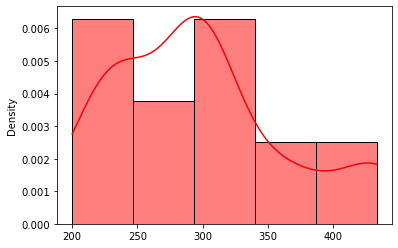

In [134]:
sns.histplot(data=dcm[5], stat='density', kde=True, kde_kws={'bw_method': .4}, color='r', bins=5)

<AxesSubplot:ylabel='Density'>

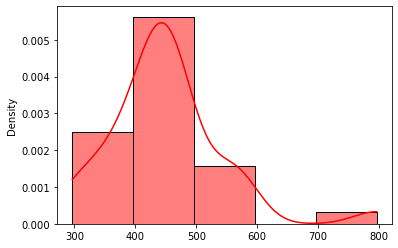

In [135]:
sns.histplot(data=dcm[6], stat='density', kde=True, kde_kws={'bw_method': .4}, color='r', bins=5)

<AxesSubplot:ylabel='Density'>

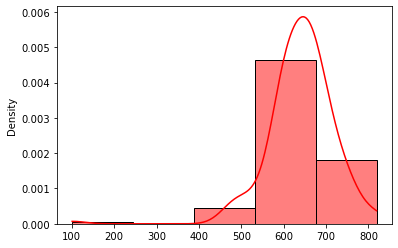

In [136]:
sns.histplot(data=dcm[7], stat='density', kde=True, kde_kws={'bw_method': .4}, color='r', bins=5)

<AxesSubplot:ylabel='Density'>

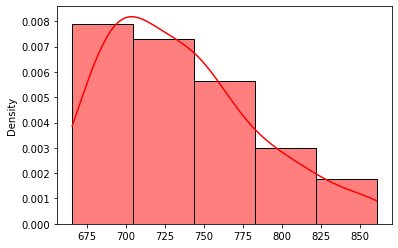

In [137]:
sns.histplot(data=dcm[8], stat='density', kde=True, kde_kws={'bw_method': .4}, color='r', bins=5)

## DCM

In [59]:
dcmm = [np.array(i) for i in df.groupby('month')['DMC'].apply(list).tolist()]

In [60]:
st.levene(dcmm[0],dcmm[1],dcmm[2],dcmm[3],dcmm[4],dcmm[5],dcmm[6],dcmm[7],dcmm[8],dcmm[9],dcmm[10],dcmm[11])

LeveneResult(statistic=7.809655421790814, pvalue=1.4554211878711579e-12)

In [61]:
st.kruskal(dcmm[0],dcmm[1],dcmm[2],dcmm[3],dcmm[4],dcmm[5],dcmm[6],dcmm[7],dcmm[8],dcmm[9],dcmm[10],dcmm[11])

KruskalResult(statistic=310.1895400253833, pvalue=6.23347018106184e-60)

### Restricción de meses

In [76]:
st.levene(dcmm[5],dcmm[6],dcmm[7],dcmm[8])

LeveneResult(statistic=4.502751297048828, pvalue=0.004026601302928546)

In [75]:
st.levene(dcmm[5],dcmm[6],dcmm[7],dcmm[8])

LeveneResult(statistic=4.502751297048828, pvalue=0.004026601302928546)

## Post Hoc Holm

In [139]:
kdcmm = [st.kruskal(dcmm[i[0]],dcmm[i[1]])[1] for i in comb_k]

In [145]:
comb_k

[(5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]

In [140]:
multipletests(kdcmm, alpha = 0.1,method = 'holm')[0]

array([False,  True,  True,  True, False,  True])

<AxesSubplot:ylabel='Density'>

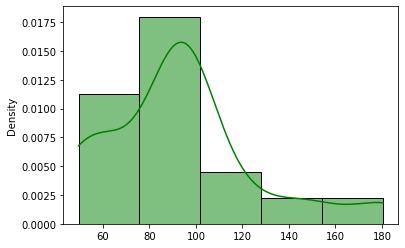

In [141]:
sns.histplot(data=dcmm[5], stat='density', kde=True, kde_kws={'bw_method': .4}, color='g', bins=5)

<AxesSubplot:ylabel='Density'>

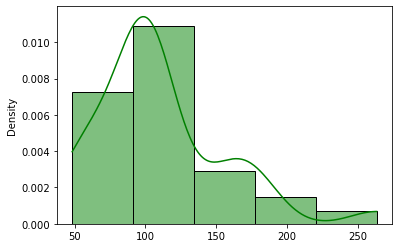

In [142]:
sns.histplot(data=dcmm[6], stat='density', kde=True, kde_kws={'bw_method': .4}, color='g', bins=5)

<AxesSubplot:ylabel='Density'>

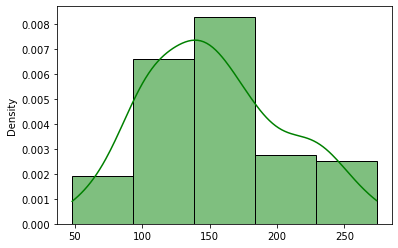

In [143]:
sns.histplot(data=dcmm[7], stat='density', kde=True, kde_kws={'bw_method': .4}, color='g', bins=5)

<AxesSubplot:ylabel='Density'>

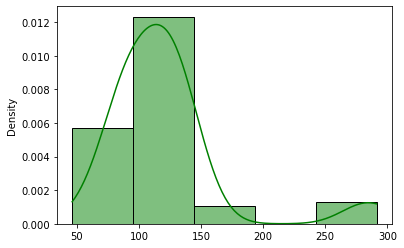

In [144]:
sns.histplot(data=dcmm[8], stat='density', kde=True, kde_kws={'bw_method': .4}, color='g', bins=5)

## Area

In [62]:
am = [np.array(i) for i in df.groupby('month')['newarea'].apply(list).tolist()]

In [63]:
st.levene(am[0],am[1],am[2],am[3],am[4],am[5],am[6],am[7],am[8],am[9],am[10],am[11])

LeveneResult(statistic=1.479056020355239, pvalue=0.13547187378035694)

In [64]:
st.kruskal(am[0],am[1],am[2],am[3],am[4],am[5],am[6],am[7],am[8],am[9],am[10],am[11])

KruskalResult(statistic=23.722518418636344, pvalue=0.013955143672609737)

## Restricción de meses

In [69]:
st.levene(am[2],am[5],am[6],am[7],am[8],am[9])

LeveneResult(statistic=1.626890726413563, pvalue=0.15132620017994497)

In [70]:
st.kruskal(am[2],am[5],am[6],am[7],am[8],am[9])

KruskalResult(statistic=7.599469468579091, pvalue=0.17973500914431537)

## Correlación de Spearman

In [224]:
st.spearmanr(df['ISI'],df['DC'])

SpearmanrResult(correlation=0.10383196737514848, pvalue=0.018197982722382423)

In [225]:
st.spearmanr(df['ISI'],df['DMC'])

SpearmanrResult(correlation=0.42515914625781054, pvalue=4.138820255204676e-24)

In [43]:
st.spearmanr(df['DC'],df['DMC'])

SpearmanrResult(correlation=0.55879058334237, pvalue=8.622361882274349e-44)

In [44]:
st.spearmanr(df['lnISI'],df['newarea'])

SpearmanrResult(correlation=0.012495928344045082, pvalue=0.7768309971321993)

In [45]:
st.spearmanr(df['DC'],df['newarea'])

SpearmanrResult(correlation=0.06163303230886902, pvalue=0.16171468994591628)

In [46]:
st.spearmanr(df['DMC'],df['newarea'])

SpearmanrResult(correlation=0.07191967077961155, pvalue=0.1023763382994315)

## Cianti

In [30]:
pd.qcut(df['lnISI'],10).value_counts()

(2.145, 2.241]     61
(1.974, 2.079]     56
(2.58, 2.728]      53
(2.392, 2.58]      53
(1.569, 1.974]     53
(-0.001, 1.569]    53
(2.314, 2.392]     52
(2.728, 4.045]     49
(2.079, 2.145]     45
(2.241, 2.314]     42
Name: lnISI, dtype: int64

In [31]:
pd.qcut(df['DMC'],10).value_counts()

(1.0990000000000002, 25.7]    54
(108.3, 122.0]                53
(82.9, 96.9]                  53
(195.18, 291.3]               52
(151.66, 195.18]              52
(96.9, 108.3]                 52
(49.5, 82.9]                  51
(25.7, 49.5]                  51
(135.7, 151.66]               50
(122.0, 135.7]                49
Name: DMC, dtype: int64

## Boxplots

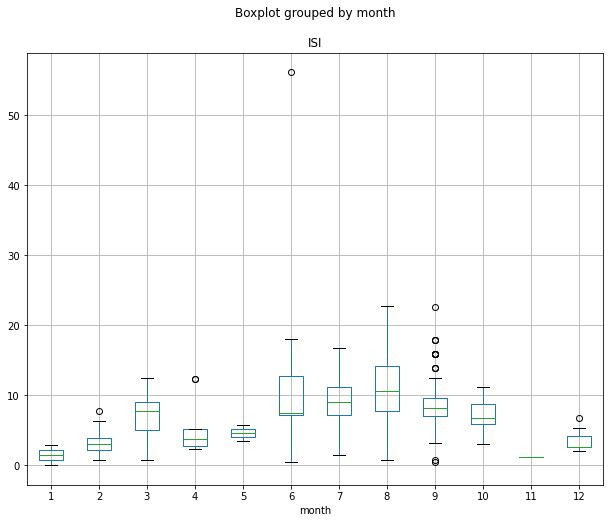

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['ISI'], by='month', ax = ax)
plt.show()

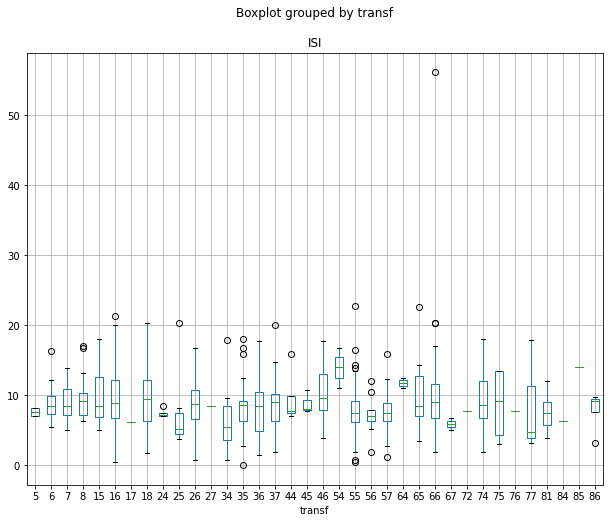

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['ISI'], by='transf', ax = ax)
plt.show()

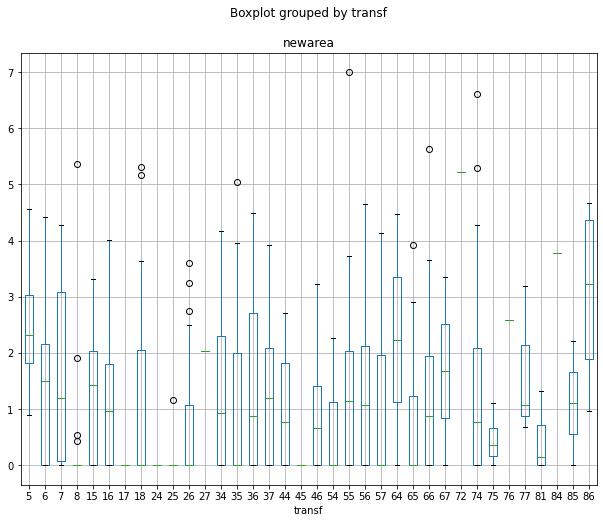

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['newarea'], by='transf', ax = ax)
plt.show()

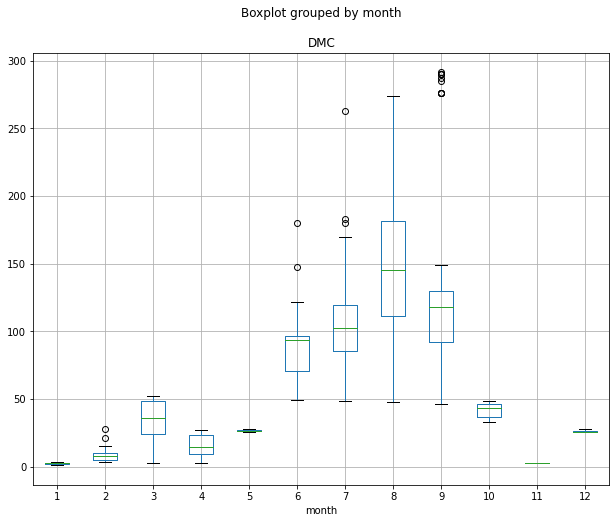

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['DMC'], by='month', ax = ax)
plt.show()

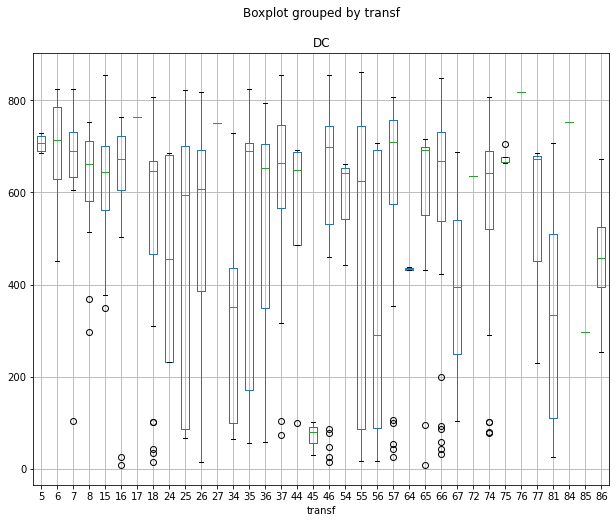

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['DC'], by='transf', ax = ax)
plt.show()

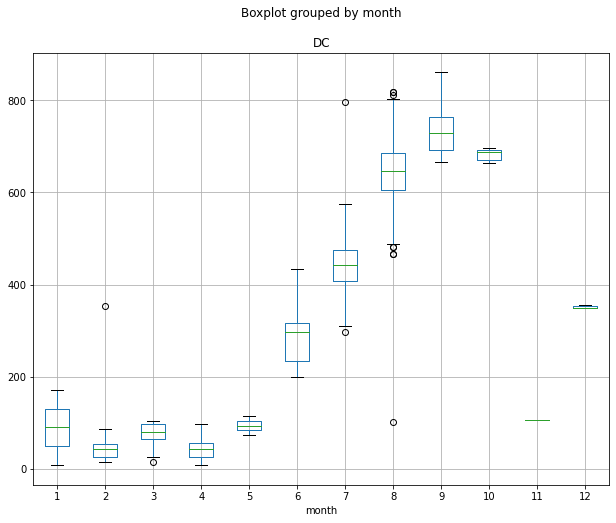

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['DC'], by='month', ax = ax)
plt.show()

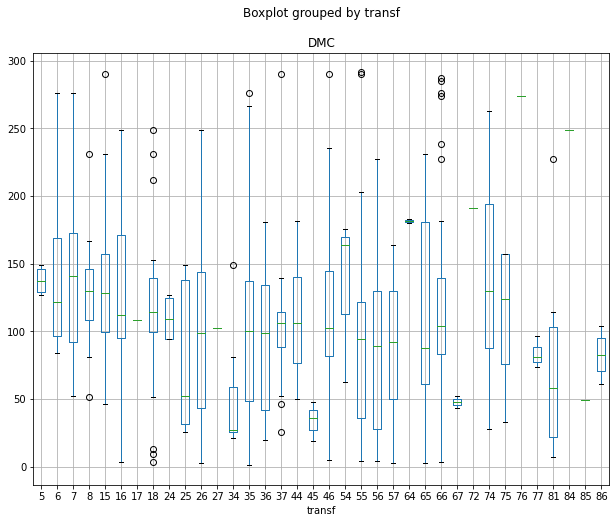

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column = ['DMC'], by='transf', ax = ax)
plt.show()

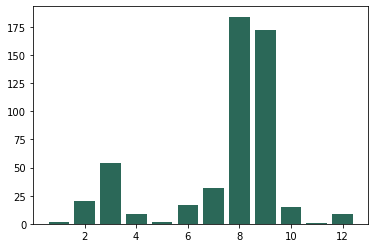

In [17]:
plot_hist_discr('month','ISI',df)

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

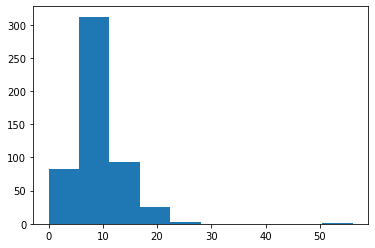

In [197]:
plt.hist(df['ISI'])

In [20]:
plt.figure(figsize =(10,8))
plot_hist_discr('month','DMC',df)

NameError: name 'plot_hist_discr' is not defined

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='ISI'>

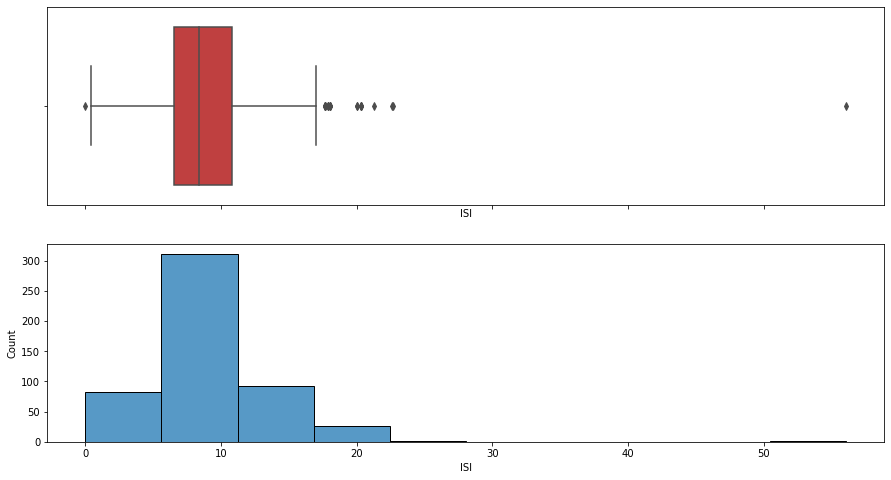

In [21]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(15,8))
sns.histplot(df['ISI'], ax=ax2, bins=10)
sns.boxplot(x=df['ISI'], ax=ax1, saturation=.5, color='r')

<AxesSubplot:xlabel='lnISI'>

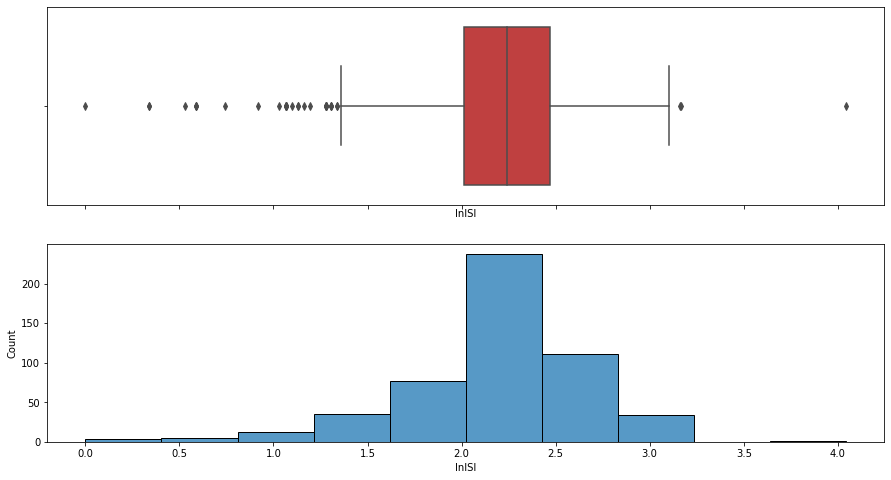

In [64]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(15,8))
sns.histplot(df['lnISI'], ax=ax2, bins=10)
sns.boxplot(x=df['lnISI'], ax=ax1, saturation=.5, color='r')

<AxesSubplot:xlabel='newarea'>

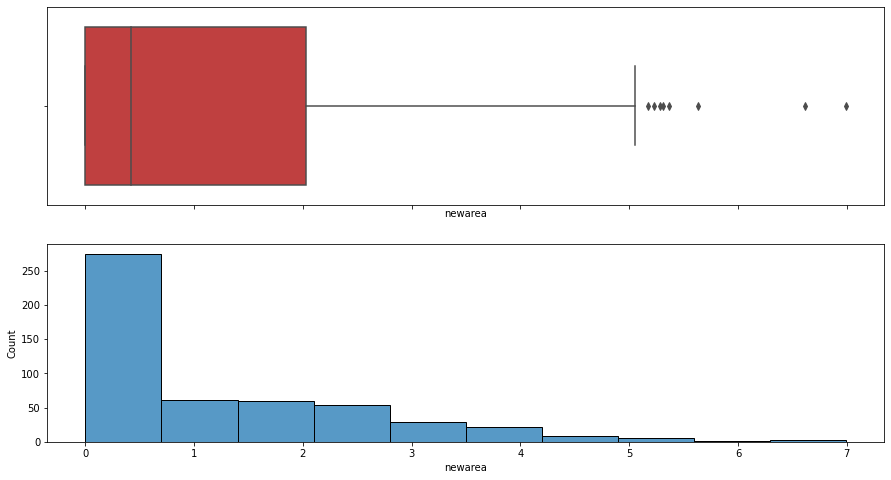

In [193]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(15,8))
sns.histplot(df['newarea'], ax=ax2, bins=10)
sns.boxplot(x=df['newarea'], ax=ax1, saturation=.5, color='r')

<AxesSubplot:xlabel='DC'>

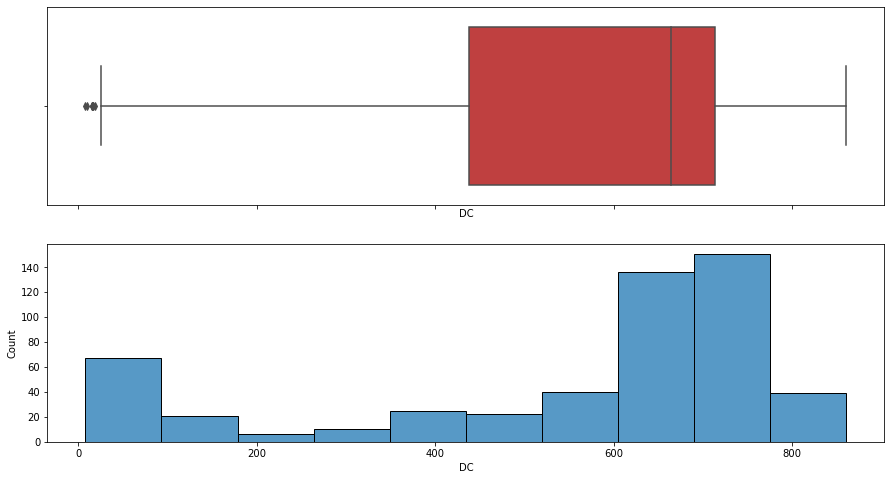

In [22]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(15,8))
sns.histplot(df['DC'], ax=ax2, bins=10)
sns.boxplot(x=df['DC'], ax=ax1, saturation=.5, color='r')

<AxesSubplot:xlabel='DMC'>

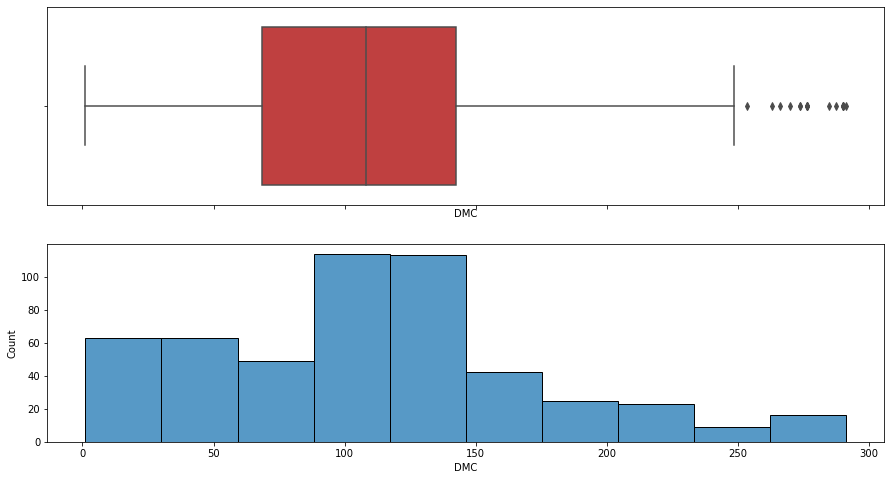

In [23]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(15,8))
sns.histplot(df['DMC'], ax=ax2, bins=10)
sns.boxplot(x=df['DMC'], ax=ax1, saturation=.5, color='r')

In [24]:
trans = (1/517)*np.array([(df['transf'] == i).sum() for i in df['transf'].unique()])

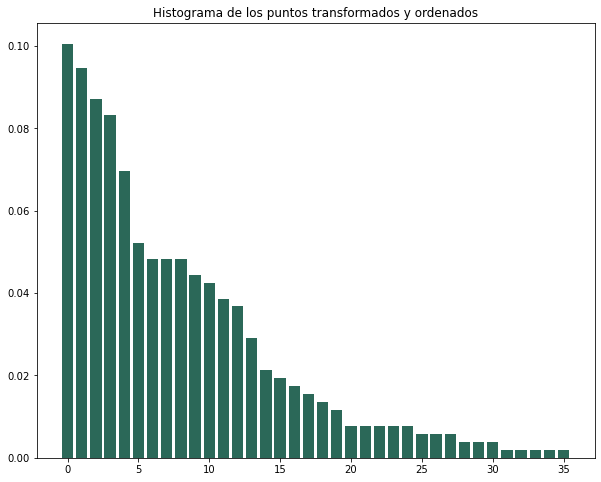

In [25]:
plt.figure(figsize =(10,8))
plt.bar(range(len(trans)),np.sort(trans)[::-1], color = '#2B6858')
plt.title('Histograma de los puntos transformados y ordenados')
plt.show()

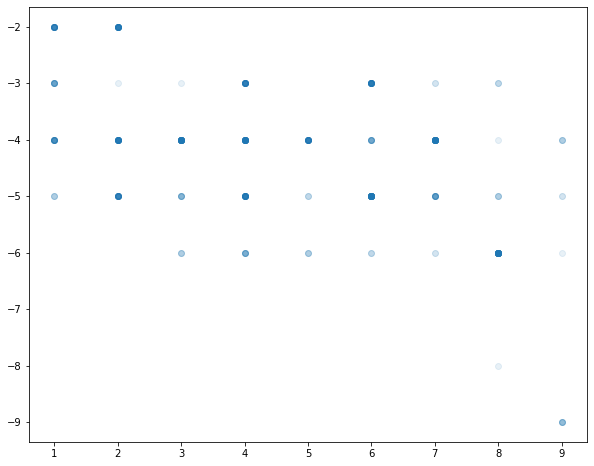

In [26]:
plt.figure(figsize =(10,8))
plt.plot(df['X'],-df['Y'],'o', alpha = 0.1)
plt.show()

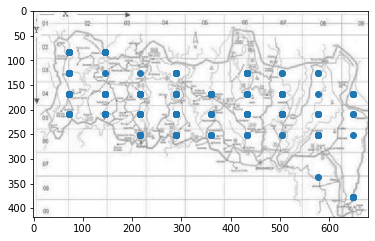

In [27]:
img = mpimg.imread('The-map-of-the-Montesinho-natural-park.png')
plt.imshow(img)
plt.plot(72*df['X'],42*df['Y'],'o')

In [ ]:
plot_dis

In [12]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [29]:
x_grid = np.linspace(0, 40, 1000)

In [48]:
transff = dict(zip(df['transf'].unique(),range(36)))

In [49]:
df['transf2'] = df['transf'].apply(lambda x: transff[x])

In [42]:
KDEMultivariate?

<AxesSubplot:xlabel='transf2', ylabel='Density'>

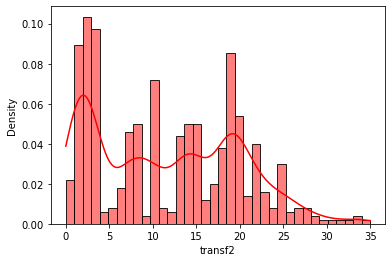

In [55]:
sns.histplot(data=df['transf2'].sort_values(ascending = True), stat='density', kde=True, kde_kws={'bw_method': .2}, color='r', bins=36)

<AxesSubplot:xlabel='ISI', ylabel='Density'>

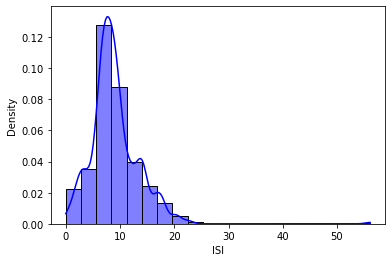

In [199]:
sns.histplot(data=df['ISI'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='b', bins=20)

In [15]:
x = np.array(df['ISI'])

In [68]:
x2 = np.array(df['newarea'])

In [73]:
x3 = np.array(df['DC'])

In [74]:
x4 = np.array(df['DMC'])

In [13]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [16]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 4.0, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 3.363265306122449}


In [66]:
x_grid = np.linspace(0, 50, 1000)

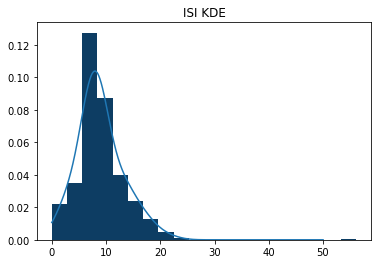

In [62]:
kde_sklearn = KernelDensity(bandwidth = 2, kernel = 'gaussian').fit(x[:,np.newaxis])
f_skle = lambda x: np.exp(kde_sklearn.score_samples(x[:, np.newaxis]))
plt.plot(x_grid, f_skle(x_grid))
plt.hist(x,bins = 20, density = True, color = '#0D3D63')
plt.title('ISI KDE')
plt.show()

In [59]:
grid = GridSearchCV(KernelDensity(kernel = 'exponential'),
                    {'bandwidth': np.linspace(0.1, 4.0, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(x2[:, None])
print(grid.best_params_)

{'bandwidth': 0.1}


In [106]:
x2_grid = np.linspace(0, 7, 1000)

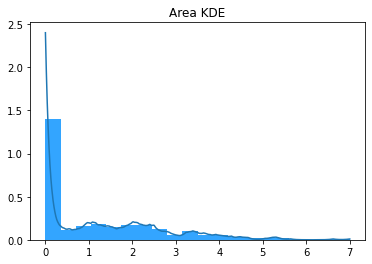

In [72]:
kde_sklearn2 = KernelDensity(bandwidth = 0.1, kernel = 'exponential').fit(x2[:,np.newaxis])
f_skle2 = lambda x: np.exp(kde_sklearn2.score_samples(x[:, np.newaxis]))
plt.plot(x2_grid, f_skle2(x2_grid))
plt.hist(x2,bins = 20, density = True, color = '#33A5FF')
plt.title('Area KDE')
plt.show()

In [93]:
x3_grid = np.linspace(0, 850, 1000)

In [82]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 100.0, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(x3[:, None])
print(grid.best_params_)

{'bandwidth': 14.371428571428572}


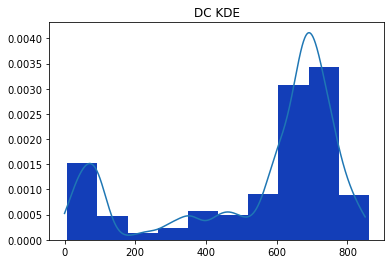

In [140]:
kde_sklearn3 = KernelDensity(bandwidth = 30, kernel = 'gaussian').fit(x3[:,np.newaxis])
f_skle3 = lambda x: np.exp(kde_sklearn3.score_samples(x[:, np.newaxis]))
plt.plot(x3_grid, f_skle3(x3_grid))
plt.hist(x3,bins = 10, density = True, color = '#133EB8')
plt.title('DC KDE')
plt.show()

In [78]:
x4_grid = np.linspace(0, 300, 1000)

In [97]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 100.0, 50)},
                    cv=20) # 20-fold cross-validation
grid.fit(x4[:, None])
print(grid.best_params_)

{'bandwidth': 4.177551020408163}


In [151]:
f_skle3 = lambda x: np.exp(kde_sklearn3.score_samples(x[:, np.newaxis]))

In [201]:
optimize.fmin?

In [148]:
max_f = f_skle3(optimize.fmin(f_skle3, 600, disp=False))

In [158]:
max_f  = -max_f 

In [160]:
t = lambda x: max_f * np.ones([len(x)])

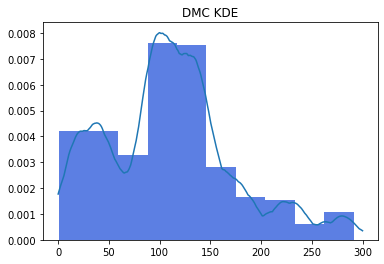

In [223]:
kde_sklearn4 = KernelDensity(bandwidth = 20, kernel = 'epanechnikov').fit(x4[:,np.newaxis])
f_skle4 = lambda x: np.exp(kde_sklearn4.score_samples(x[:, np.newaxis]))
plt.plot(x4_grid, f_skle4(x4_grid))
plt.hist(x4,bins = 10, density = True, color = '#5C7FE3')
plt.title('DMC KDE')
plt.show()

In [142]:
def estratificado(N:'Número de variables a generar'):
    """
    Función que devuelve un vector de longitud N con variables aleatorias distribuidas uniformemente y utilizando
    el método de reducción de la varianza por estratificación
    """
    vec = np.random.rand(N)
    aux = np.arange(0,N)
    return (vec + aux)/N

In [215]:
def Acep_rechazo(R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    R2 = np.random.rand(N)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

In [210]:
x = np.linspace(0,850,100)

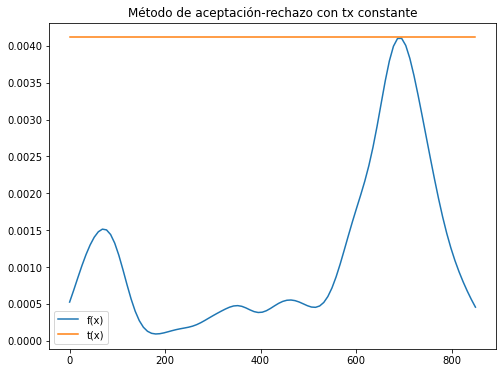

In [219]:
N = 5000
R1 = 850*estratificado(N)

plt.figure(figsize= (8,6))
plt.plot(x,f_skle3(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.title('Método de aceptación-rechazo con tx constante')
aprobc = Acep_rechazo(R1,f_skle3,t)
plt.show()

In [221]:
len(aprobc)

1399

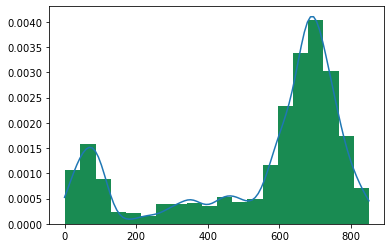

In [220]:
plt.plot(x,f_skle3(x),label='f(x)')
plt.hist(aprobc, bins = 20, density = True, color = '#198B52' );

In [137]:
media = df['newarea'].mean()

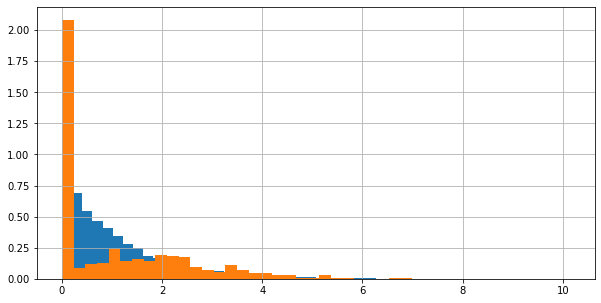

In [214]:
N = int(1e4)
espon = st.expon(loc = 0, scale =media).rvs(size = N, random_state = 123)
fig, ax = plt.subplots(1,1,figsize =[10,5], sharey = True)
ax.hist(espon,bins = 50, density = True, label = 'datos reales')
df.newarea.hist(ax=ax, bins = 30, density = True,label = 'Datos reales')
plt.show()

<AxesSubplot:xlabel='lnISI', ylabel='Density'>

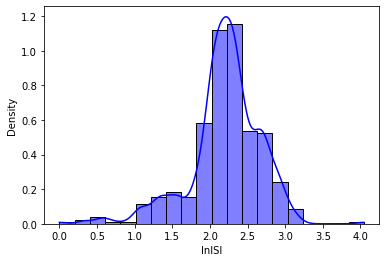

In [21]:
sns.histplot(data=df['lnISI'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='b', bins=20)

<AxesSubplot:xlabel='DMC', ylabel='Density'>

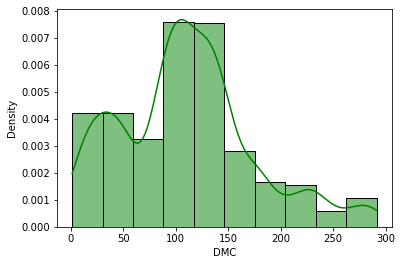

In [77]:
sns.histplot(data=df['DMC'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='g', bins=10)

<AxesSubplot:xlabel='DC', ylabel='Density'>

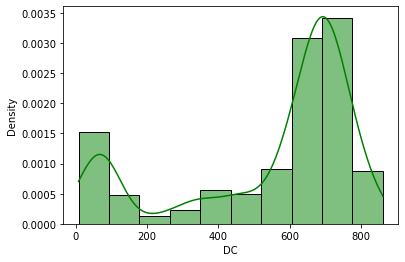

In [74]:
sns.histplot(data=df['DC'], stat='density', kde=True, kde_kws={'bw_method': .2}, color='g', bins=10)

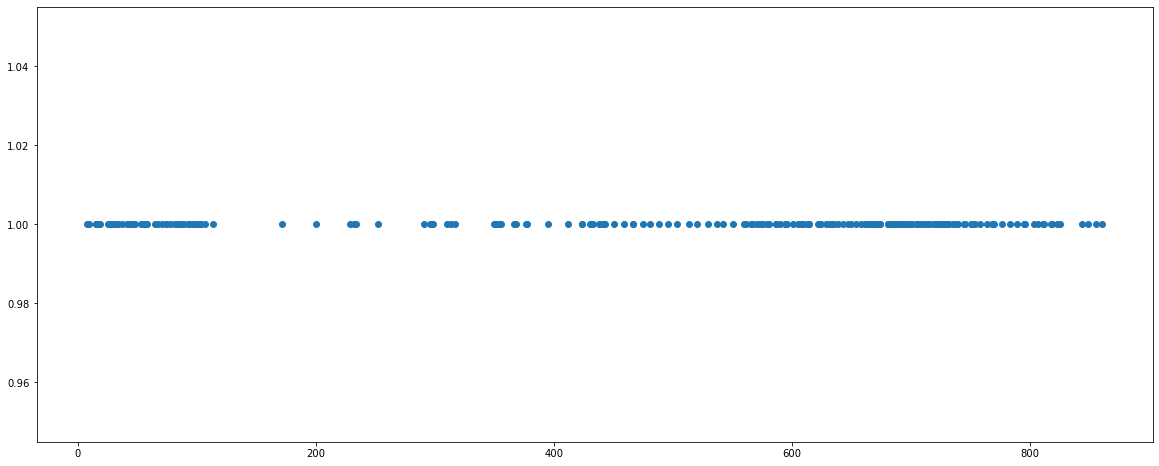

In [15]:
plt.figure(figsize=(20,8))
plt.plot(df['DC'].unique(),np.ones(len(df['DC'].unique())), 'o')

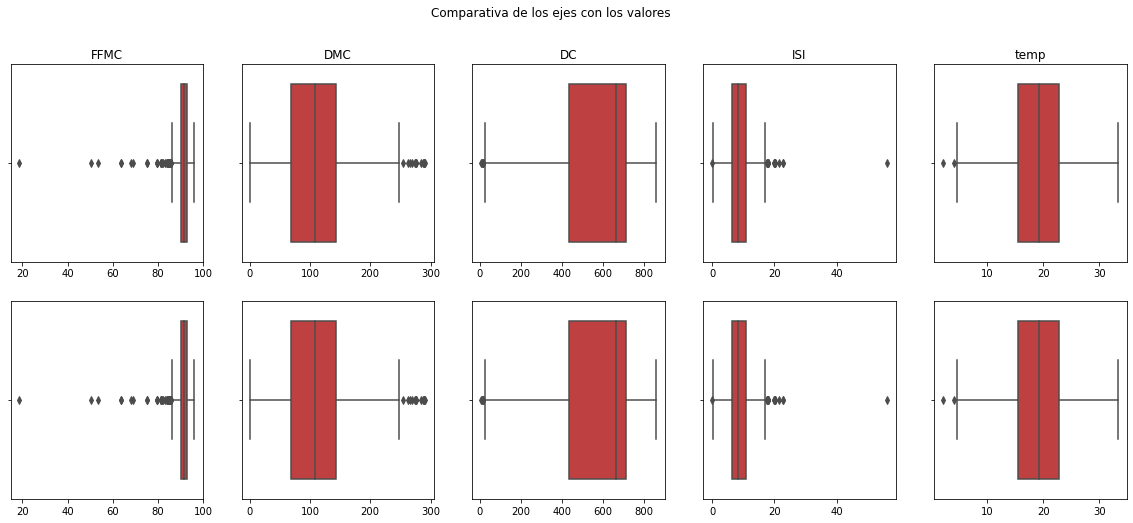

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 5, figsize=(20,8))
pl = lambda s,i: sns.boxplot(x=s, ax=ax1[i], saturation=.5, color='r')
titles = lambda t,i: ax1[i].title.set_text(t[i])
[pl(plot_map[i],i) for i in range(5)]
[titles(t1,i) for i in range(5)]
pl2 = lambda s,i: sns.boxplot(x=s, ax=ax2[i], saturation=.5, color='r')
[pl2(plot_map[i],i) for i in range(5)]
fig.suptitle('Comparativa de los ejes con los valores')
plt.show()

In [28]:
a = [df[df['month']== i] for i in range(0,13)]

In [33]:
bui = lambda p,d: 0.8*p*d/(p+0.4*d) if p <= 0.4*d else p - (1-0.8*d/(p+0.4*d))*(0.92+(0.0114*p)**1.7)

In [41]:
df['BUI'] = [bui(df.loc[i,'DMC'],df.loc[i,'DC']) for i in range(517)]

In [42]:
df

X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5      3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4     10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4     10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6      3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6      3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3      8    7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4      8    7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3     11    2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

            BUI  
0     30.921902  
1     62.529409  
2     75.406720  
3     33.260199  
4     51.150592  
..          ...  
512   93.489862  
513   93.489862  
514   93.489862  
515  183.211595  
516    5.605954  

[517 rows x 14 columns]

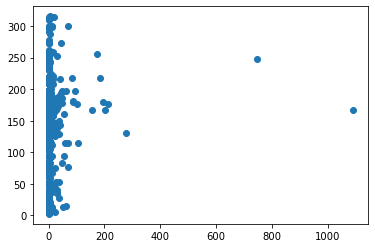

In [44]:
plt.plot(df['area'], df['BUI'],'o')

In [16]:
def plot_hist_discr(a:'columna x', b:'columna y',data:'data'):
    columns = data.groupby([a])[b].count()
    plt.bar(columns.index,columns, color = '#2B6858')
    plt.show()

In [7]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

In [8]:
def plot_mean(a:'columna x', b:'columna y',data:'data'):
    mean = data.groupby([a])[b].mean()
    plt.plot(mean.index,mean, color = '#F9E02A')
    mini = data.groupby([a])[b].min()
    plt.plot(mini.index,mini, color = '#2B6858')
    maxi = data.groupby([a])[b].max()
    plt.plot(maxi.index,maxi, color = '#FF5733')
    plt.title(b)
    plt.show()

In [19]:
aux = [df[df['month'] == i].FFMC for i in range(1,13)]

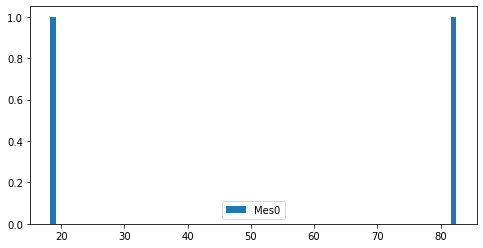

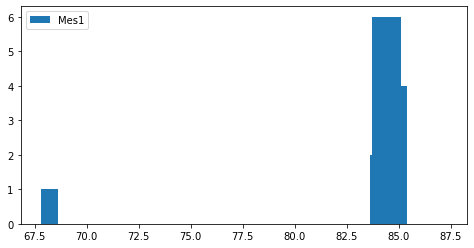

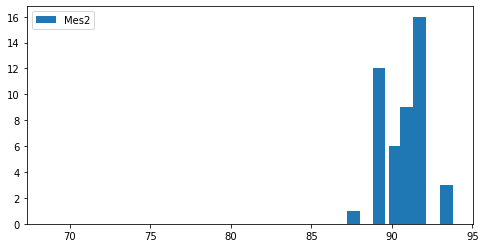

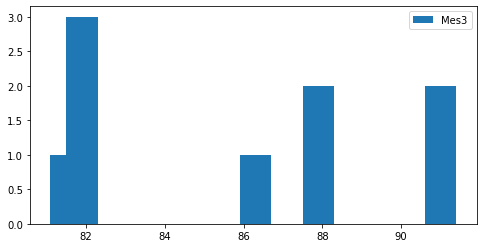

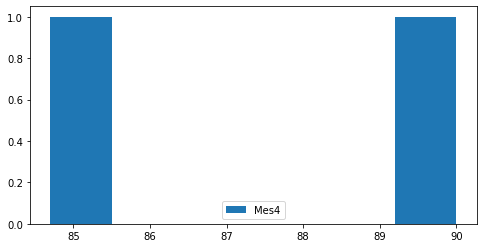

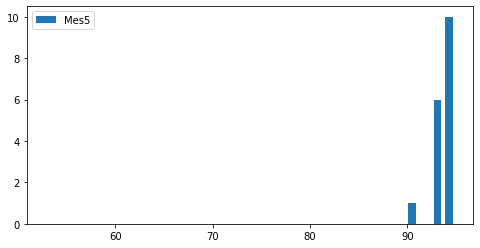

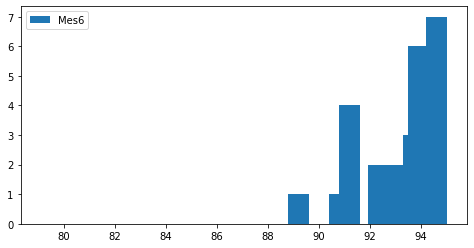

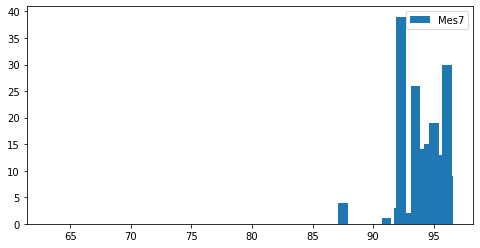

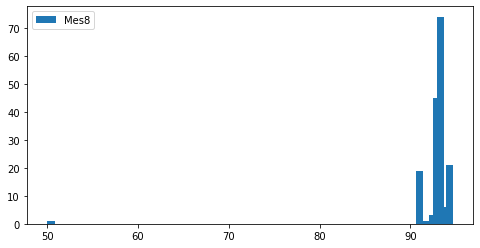

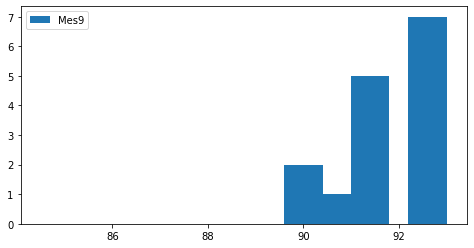

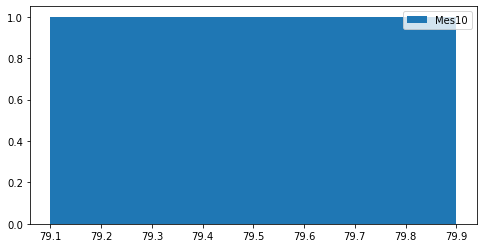

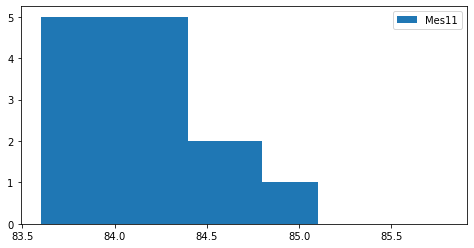

In [20]:
[plot_histogram_discrete(aux[i],'Mes'+str(i)) for i in range(12)];

In [23]:
st.pearsonr(df['DC'],df['area'])

(0.049383225298916214, 0.26236288236382377)

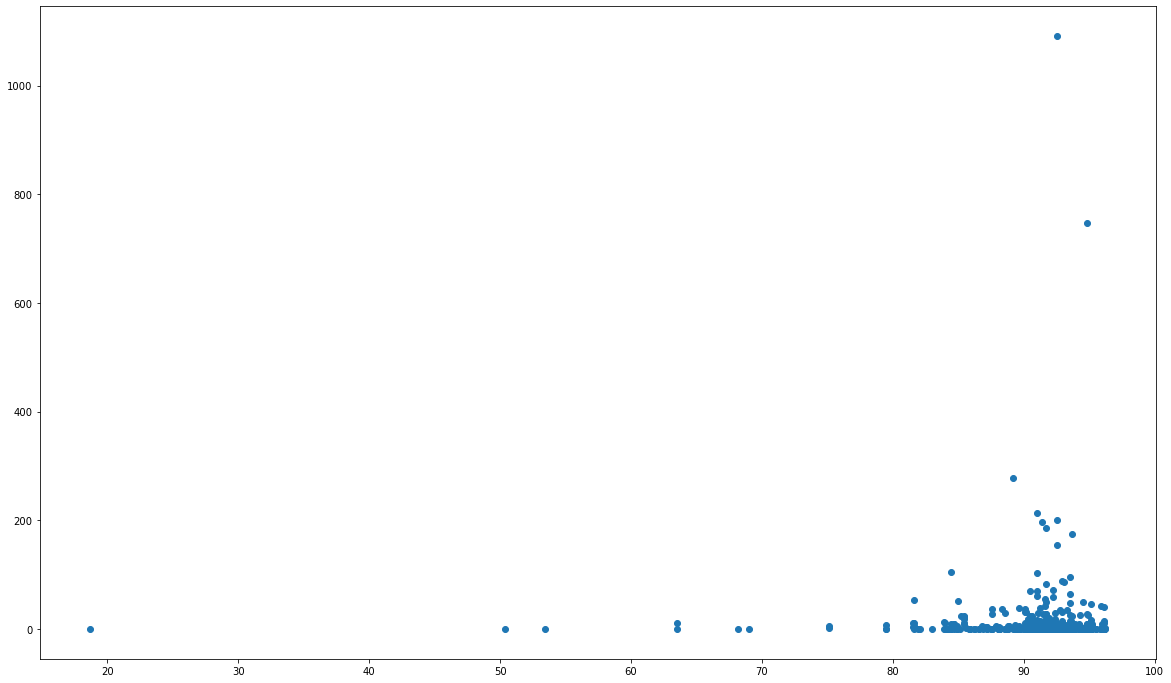

In [28]:
plt.figure(figsize = (20,12))
plt.plot(df['FFMC'],df['area'],'o')

In [116]:
df['Y'].unique()

array([5, 4, 6, 3, 2, 9, 8], dtype=int64)

In [71]:
df['transf'] = 10*df['X'] - df['Y']

In [9]:
plot_map2 = np.array(df.iloc[:,9:12]).T
t2 = df.columns[9:12]

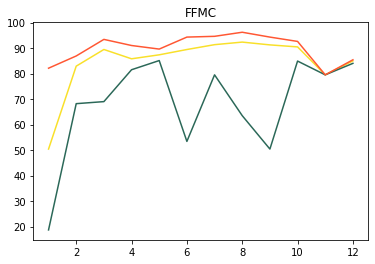

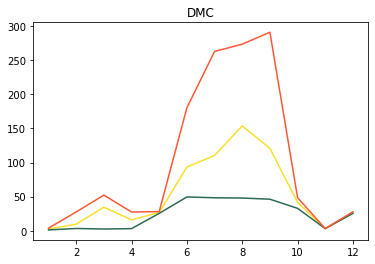

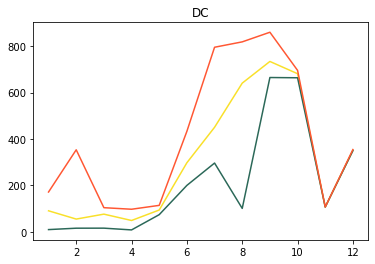

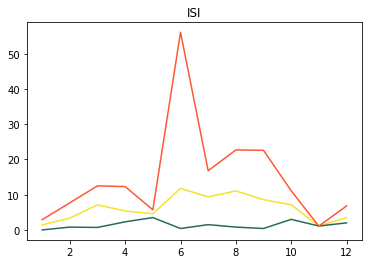

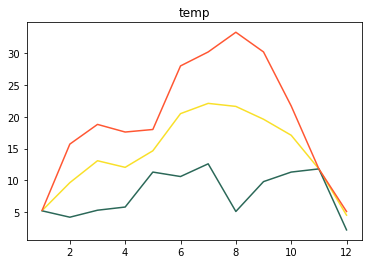

In [10]:
plotme = lambda x:plot_mean('month',x,df)
[plotme(i) for i in t1];

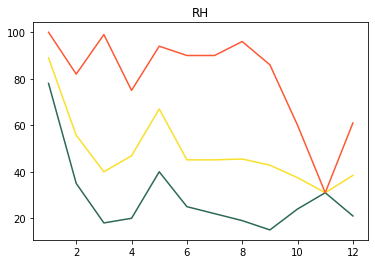

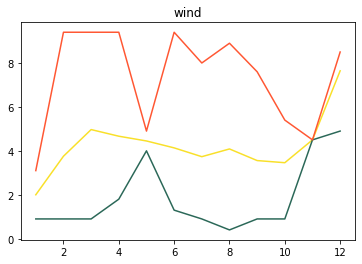

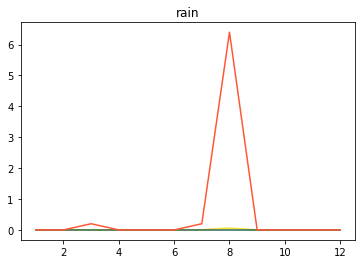

In [11]:
[plotme(i) for i in t2];

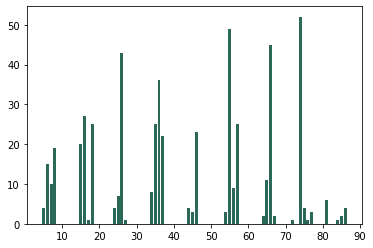

In [32]:
plot_hist_discr('transf','DMC',df)

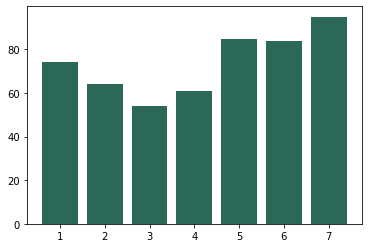

In [14]:
plot_hist_discr('day','DMC',df)

In [15]:
x = df['X']
y = df['Y']

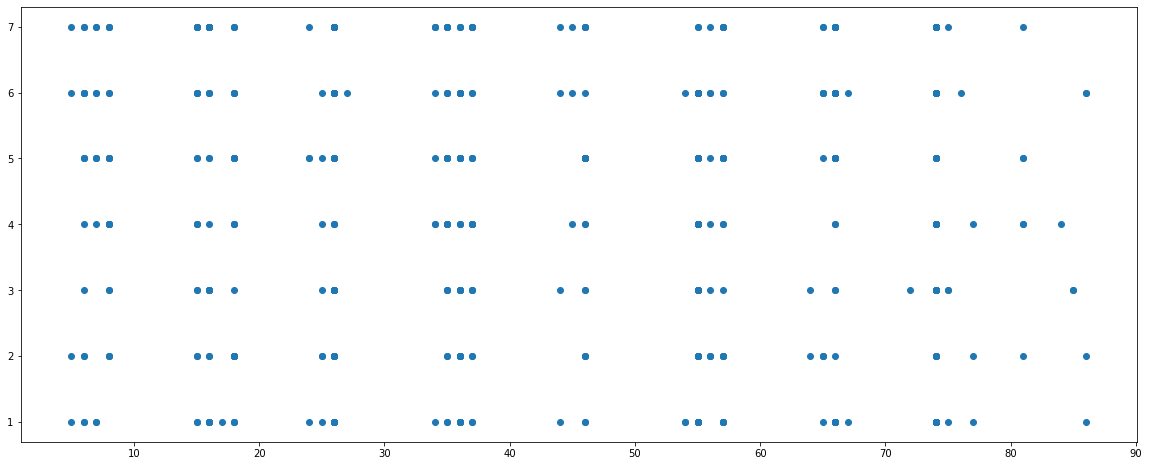

In [42]:
plt.figure(figsize = (20,8))
plt.plot(df['transf'],df['day'],'o')

In [64]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=d0cbb0bca3910ce29b1c451cfc67ae5183c4571a01d6f335fad29da0066a6303
  Stored in directory: c:\users\flavi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [29]:
import plotly.express as px

In [32]:
fig = px.scatter_3d(df, x='month', y='FFMC', z='DMC', size='area', color='DMC')
fig.update_layout(scene_zaxis_type="log")
fig.show()

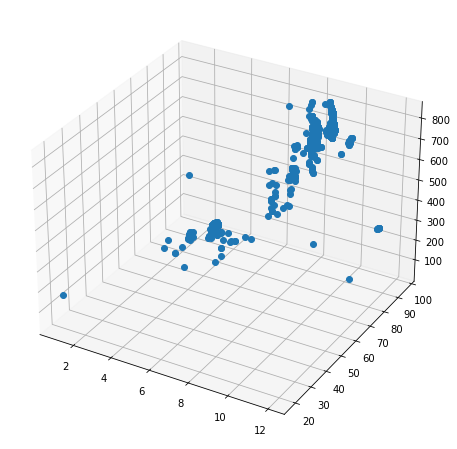

In [31]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(df['month'],df['FFMC'],df['DC'], 'o')

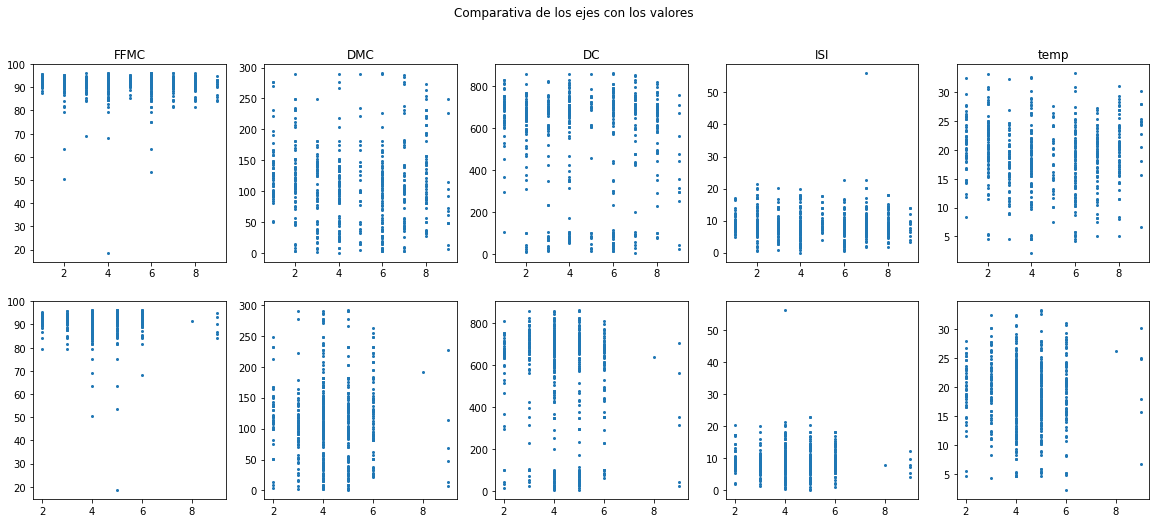

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 5, figsize=(20,8))
pl = lambda s,i: ax1[i].plot(x,s,'o', markersize=2)
titles = lambda t,i: ax1[i].title.set_text(t[i])
[pl(plot_map[i],i) for i in range(5)]
[titles(t1,i) for i in range(5)]
pl2 = lambda s,i: ax2[i].plot(y,s,'o', markersize=2)
[pl2(plot_map[i],i) for i in range(5)]
fig.suptitle('Comparativa de los ejes con los valores')
plt.show()

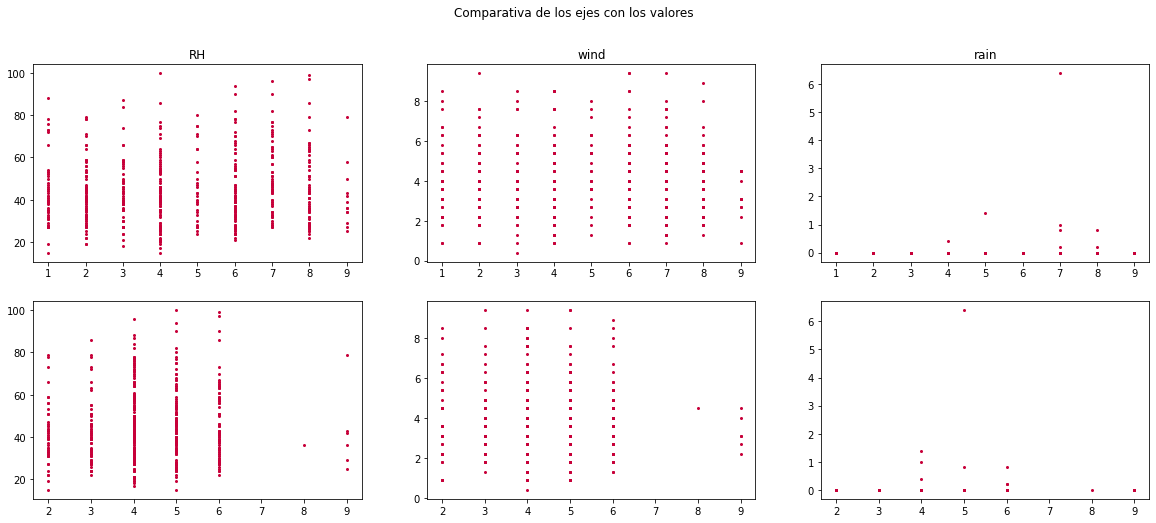

In [39]:
fig, (ax3, ax4) = plt.subplots(2, 3, figsize=(20,8))
pl = lambda s,i: ax3[i].plot(x,s,'o', color = '#C70039', markersize=2)
[pl(plot_map2[i],i) for i in range(3)]
titles = lambda t,i: ax3[i].title.set_text(t[i])
[titles(t2,i) for i in range(3)]
pl2 = lambda s,i: ax4[i].plot(y,s,'o',color = '#C70039', markersize=2)
[pl2(plot_map2[i],i) for i in range(3)]
fig.suptitle('Comparativa de los ejes con los valores')
plt.show()

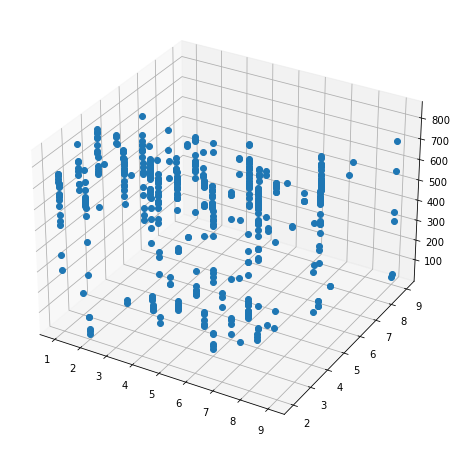

In [40]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection = "3d") #Agregar la tercera dimensión

ax.plot(x,y,df['DC'], 'o')